In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
groceries = []
with open("groceries.csv") as f:
     groceries = f.read().split("\n")   #it will split the data into different lines in reading format.
    

In [3]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

all_groceries_list = [i for item in groceries_list for i in item]


In [4]:
from collections import Counter # ,OrderedDict

item_frequencies = Counter(all_groceries_list)


In [5]:
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])

# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))


In [9]:
# Creating Data Frame for the transactions data
groceries_series = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835, :] # removing the last empty transaction

groceries_series.columns = ["transactions"]

# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep = '*').str.get_dummies(sep = '*')

X

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:


frequent_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames = True)

# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)

<ipython-input-11-e2d84677c3b4>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk');plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=20)


([<matplotlib.axis.XTick at 0x17a82f75820>,
 [Text(0, 0, "frozenset({'whole milk'})"),
  Text(1, 0, "frozenset({'other vegetables'})"),
  Text(2, 0, "frozenset({'rolls/buns'})"),
  Text(3, 0, "frozenset({'soda'})"),
  Text(4, 0, "frozenset({'yogurt'})"),
  Text(5, 0, "frozenset({'bottled water'})"),
  Text(6, 0, "frozenset({'root vegetables'})"),
  Text(7, 0, "frozenset({'tropical fruit'})"),
  Text(8, 0, "frozenset({'shopping bags'})"),
  Text(9, 0, "frozenset({'sausage'})"),
  Text(10, 0, "frozenset({'pastry'})")])

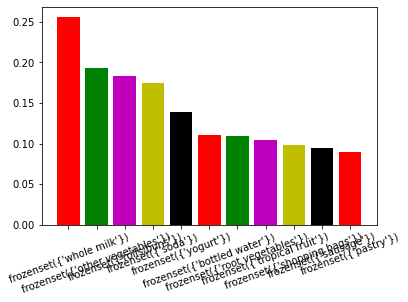

In [11]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='rgmyk');plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=20)

In [12]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1174,"(whole milk, tropical fruit)","(yogurt, other vegetables)",0.042298,0.043416,0.007626,0.180288,4.152546,0.005789,1.166976
1171,"(yogurt, other vegetables)","(whole milk, tropical fruit)",0.043416,0.042298,0.007626,0.175644,4.152546,0.005789,1.161758
1093,"(whole milk, other vegetables)","(yogurt, root vegetables)",0.074835,0.025826,0.007829,0.104620,4.050919,0.005896,1.088000
1088,"(yogurt, root vegetables)","(whole milk, other vegetables)",0.025826,0.074835,0.007829,0.303150,4.050919,0.005896,1.327638
793,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
792,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
1170,"(yogurt, whole milk)","(other vegetables, tropical fruit)",0.056024,0.035892,0.007626,0.136116,3.792358,0.005615,1.116016
1175,"(other vegetables, tropical fruit)","(yogurt, whole milk)",0.035892,0.056024,0.007626,0.212465,3.792358,0.005615,1.198645
1049,"(beef, other vegetables)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123
1052,(root vegetables),"(beef, other vegetables)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197


In [13]:
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]



In [14]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
792,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
678,"(pip fruit, other vegetables)",(tropical fruit),0.026131,0.104931,0.009456,0.361868,3.448613,0.006714,1.402638
582,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
1166,"(yogurt, whole milk, other vegetables)",(tropical fruit),0.022267,0.104931,0.007626,0.342466,3.263712,0.005289,1.361250
1048,"(root vegetables, other vegetables)",(beef),0.047382,0.052466,0.007931,0.167382,3.190313,0.005445,1.138018
1004,"(root vegetables, whole milk)",(beef),0.048907,0.052466,0.008033,0.164241,3.130449,0.005467,1.133741
172,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
534,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
974,"(root vegetables, yogurt)",(tropical fruit),0.025826,0.104931,0.008134,0.314961,3.001587,0.005424,1.306594
776,"(citrus fruit, other vegetables)",(tropical fruit),0.028876,0.104931,0.009049,0.313380,2.986526,0.006019,1.303587
